In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
import os

from sklearn.model_selection import train_test_split

seed = 1
# # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean_train.csv")
df = df[df['CATEGORY'] != '1 0 0 0']
df.head()

,ADDRESS,OPCODE,CATEGORY
1470,0xc150b5f72521f7501c828aad26c9a608ead350f3,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,0 1 0 0
1483,0x3e72c21f50170a76149dce9b8ba1eccbd5973ac7,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,0 0 0 1
1537,0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,0 0 1 0
1849,0x78530704aa62a96f6e2f20fb4621ea740fb18dcc,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,0 0 0 1
2442,0x4574ff7d8e558ae89ce179abfac16f44eca1d493,60 60 52 36 15 60 57 60 56 5b 60 5b 7f 60 51 8...,0 0 0 1


In [3]:
def label(df):
    # label data
    df['LABEL'] = 0
    df.loc[df['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
    df.loc[df['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
    df.loc[df['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
    df.loc[df['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
    df.loc[df['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4


def preprocess(df):
    n_most_common_words = 1600
    max_len = 100  #the length of opcode

    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=n_most_common_words, lower=False)

    # tokenizer.fit_on_texts(increased_vul['OPCODE'].values)
    tokenizer.fit_on_texts(df['OPCODE'].values)
    sequences = tokenizer.texts_to_sequences(df['OPCODE'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    X = tf.keras.utils.pad_sequences(sequences, maxlen=max_len)
    return X


def dftoXY(df):
    X_test = preprocess(df)
    label(df)
    print(pd.value_counts(df['LABEL']))
    y_test = tf.keras.utils.to_categorical(df['LABEL'], num_classes=5)
    return X_test, y_test


def XandY(sp_df, g_df, p_df, s_df):
    dfset = pd.concat([sp_df, g_df, p_df, s_df])
    dfset = dfset.sample(frac=1, random_state=39, replace=False)

    dfset['LABEL'] = 0

    dfset.loc[dfset['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
    dfset.loc[dfset['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
    dfset.loc[dfset['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
    dfset.loc[dfset['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
    dfset.loc[dfset['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

    X, y = dftoXY(dfset)

    print('Shape of X: {}'.format(X.shape))

    y_labels = np.expand_dims(np.array(np.argmax(y, axis=1)), axis=1)
    print('Shape of y: {}'.format(y_labels.shape))

    return X, y_labels

In [4]:
data = df
pd.value_counts(data['CATEGORY'])

0 0 0 1    5801
0 0 1 0    1461
0 1 0 0    1207
0 1 1 0     171
Name: CATEGORY, dtype: int64

In [5]:
#new code
data_plots = data
data_plots = data_plots.replace({'CATEGORY': {'0 1 0 0': 'suicidal', '0 0 1 0': 'prodigal', '0 0 0 1': 'greedy',
                                              '0 1 1 0': 'suicidal and prodigal'}})
data_plots.head()

,ADDRESS,OPCODE,CATEGORY
1470,0xc150b5f72521f7501c828aad26c9a608ead350f3,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,suicidal
1483,0x3e72c21f50170a76149dce9b8ba1eccbd5973ac7,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,greedy
1537,0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,prodigal
1849,0x78530704aa62a96f6e2f20fb4621ea740fb18dcc,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,greedy
2442,0x4574ff7d8e558ae89ce179abfac16f44eca1d493,60 60 52 36 15 60 57 60 56 5b 60 5b 7f 60 51 8...,greedy


#Plot unbalanced

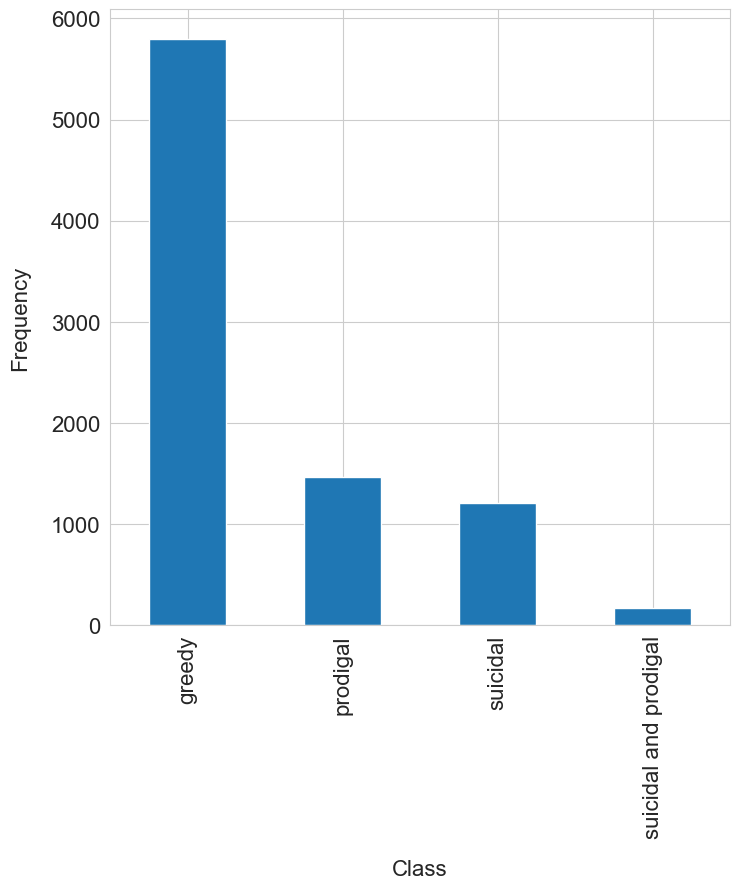

In [6]:
sns.set_style("whitegrid")
fig = plt.figure()

count_classes = pd.value_counts(data_plots['CATEGORY'], sort=True).sort_index()
count_classes.plot(kind='bar')
# plt.title("Vulnerability Class Histogram")
plt.xlabel("Class", fontsize=16, labelpad=15)
plt.ylabel("Frequency", fontsize=16, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.set_size_inches(8, 8)
plt.savefig('outputs_4/vulnerability_class_hist.pdf', bbox_inches='tight')
plt.show()

In [7]:
count_classes

greedy                   5801
prodigal                 1461
suicidal                 1207
suicidal and prodigal     171
Name: CATEGORY, dtype: int64

In [8]:
len(data_plots)

8640

In [9]:
shuffled = data

# shuffled = data
# n = shuffled[shuffled['CATEGORY'] == '1 0 0 0'] # no vulnerabilities
s = shuffled[shuffled['CATEGORY'] == '0 1 0 0']  # suicidal
p = shuffled[shuffled['CATEGORY'] == '0 0 1 0']  # prodigal
g = shuffled[shuffled['CATEGORY'] == '0 0 0 1']  # greedy
sp = shuffled[shuffled['CATEGORY'] == '0 1 1 0']  # suicidal and prodigal

### Dividing on train, validation, and test


In [10]:
proportion_train = 0.7
proportion_val = 0.1
proportion_test = 0.2

#s
s_shuf = s.sample(frac=1, random_state=39, replace=False)
num_s_train = round(len(s_shuf) * proportion_train)
num_s_val = round(len(s_shuf) * proportion_val)
s_train = s_shuf.iloc[0:num_s_train]
s_val = s_shuf.iloc[num_s_train:(num_s_train + num_s_val)]
s_test = s_shuf.iloc[(num_s_train + num_s_val):]

#p
p_shuf = p.sample(frac=1, random_state=39, replace=False)
num_p_train = round(len(p_shuf) * proportion_train)
num_p_val = round(len(p_shuf) * proportion_val)
p_train = p_shuf.iloc[0:num_p_train]
p_val = p_shuf.iloc[num_p_train:(num_p_train + num_p_val)]
p_test = p_shuf.iloc[(num_p_train + num_p_val):]

#g
g_shuf = g.sample(frac=1, random_state=39, replace=False)
num_g_train = round(len(g_shuf) * proportion_train)
num_g_val = round(len(g_shuf) * proportion_val)
g_train = g_shuf.iloc[0:num_g_train]
g_val = g_shuf.iloc[num_g_train:(num_g_train + num_g_val)]
g_test = g_shuf.iloc[(num_g_train + num_g_val):]

#sp
sp_shuf = sp.sample(frac=1, random_state=39, replace=False)
num_sp_train = round(len(sp_shuf) * proportion_train)
num_sp_val = round(len(sp_shuf) * proportion_val)
sp_train = sp_shuf.iloc[0:num_sp_train]
sp_val = sp_shuf.iloc[num_sp_train:(num_sp_train + num_sp_val)]
sp_test = sp_shuf.iloc[(num_sp_train + num_sp_val):]

# Resampling samples

In [11]:
#====train set
df_train = pd.concat([sp_train, g_train, p_train, s_train])
df_train = df_train.sample(frac=1, random_state=39, replace=False)
df_train['LABEL'] = 0

df_train['LABEL'] = 0

#One-hot encode the lab
df_train.loc[df_train['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_train.loc[df_train['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_train.loc[df_train['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_train.loc[df_train['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_train.loc[df_train['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_train, y_train = dftoXY(df_train)
df_train

Found 150 unique tokens.
3    4061
2    1023
1     845
4     120
Name: LABEL, dtype: int64


,ADDRESS,OPCODE,CATEGORY,LABEL
469583,0xaa2035b83c9242e85475b6f792d923833b9f400d,60 60 52 60 35 7c 90 04 80 63 14 61 57 80 63 1...,0 1 1 0,4
171281,0xd9f82af151fcd0ffb7f5f644ec50eeb878045a55,60 60 52 60 60 0a 60 35 04 63 81 14 61 57 80 6...,0 1 0 0,1
716051,0xe996b72d2073762d8286cda86d0d1ce655e887c5,60 61 53 7c 60 35 04 63 81 14 15 61 57 60 35 6...,0 0 0 1,3
463739,0x699cbe575672adf1e43b1e2b4c7d34b4a72cb7bc,60 60 52 36 15 60 57 60 35 7c 90 04 80 63 14 6...,0 0 0 1,3
689481,0xaf368f3375bcd46e29a61f06223ba75be11465bb,60 60 52 36 15 61 57 60 35 7c 90 04 80 63 14 6...,0 0 1 0,2
...,...,...,...,...
463644,0xc7b7314a6c664c58c6132a441960a243d2a0aed3,60 60 52 36 15 61 57 60 35 7c 90 04 80 63 14 6...,0 0 0 1,3
867679,0xda608b95a953cf90cb6e8cd3f58cedf918e6dd19,60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...,0 0 0 1,3
861238,0xf1ab091b9e678ffb5009cf8c9005e2bf6c8aa2ff,60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...,0 0 0 1,3
812958,0x4c5a1156f36c78c619bbcd53cbdac3bcb026ef2b,60 60 52 60 35 7c 90 04 80 63 14 61 57 80 63 1...,0 1 1 0,4


In [12]:
#====train set
df_train = pd.concat([sp_train, g_train, p_train, s_train])
df_train = df_train.sample(frac=1, random_state=39, replace=False)
df_train['LABEL'] = 0

#One-hot encoding
df_train.loc[df_train['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_train.loc[df_train['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_train.loc[df_train['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_train.loc[df_train['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_train.loc[df_train['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_train, y_train = dftoXY(df_train)

print('Shape of X: {}'.format(X_train.shape))

# for sm.fit_sample
ytrain_labels = np.expand_dims(np.array(np.argmax(y_train, axis=1)), axis=1)
print('Shape of y: {}'.format(ytrain_labels.shape))

# ============ validation set ============ 
df_val = pd.concat([sp_val, g_val, p_val, s_val])
df_val = df_val.sample(frac=1, random_state=39, replace=False)

df_val['LABEL'] = 0

#One-hot encoding
df_val.loc[df_val['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_val.loc[df_val['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_val.loc[df_val['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_val.loc[df_val['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_val.loc[df_val['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

X_val, y_val = dftoXY(df_val)

print('Shape of X: {}'.format(X_val.shape))

# for sm.fit_sample
yval_labels = np.expand_dims(np.array(np.argmax(y_val, axis=1)), axis=1)
print('Shape of y: {}'.format(yval_labels.shape))

# ============ test set ============ 
df_test = pd.concat([sp_test, g_test, p_test, s_test])
df_test = df_test.sample(frac=1, random_state=39, replace=False)

df_test['LABEL'] = 0

#One-hot encoding
df_test.loc[df_test['CATEGORY'] == '1 0 0 0', 'LABEL'] = 0
df_test.loc[df_test['CATEGORY'] == '0 1 0 0', 'LABEL'] = 1
df_test.loc[df_test['CATEGORY'] == '0 0 1 0', 'LABEL'] = 2
df_test.loc[df_test['CATEGORY'] == '0 0 0 1', 'LABEL'] = 3
df_test.loc[df_test['CATEGORY'] == '0 1 1 0', 'LABEL'] = 4

# df_train.head()

X_test, y_test = dftoXY(df_test)

print('Shape of X: {}'.format(X_test.shape))

# for sm.fit_sample
ytest_labels = np.expand_dims(np.array(np.argmax(y_test, axis=1)), axis=1)
print('Shape of y: {}'.format(ytest_labels.shape))


Found 150 unique tokens.
3    4061
2    1023
1     845
4     120
Name: LABEL, dtype: int64
Shape of X: (6049, 100)
Shape of y: (6049, 1)
Found 150 unique tokens.
3    580
2    146
1    121
4     17
Name: LABEL, dtype: int64
Shape of X: (864, 100)
Shape of y: (864, 1)
Found 150 unique tokens.
3    1160
2     292
1     241
4      34
Name: LABEL, dtype: int64
Shape of X: (1727, 100)
Shape of y: (1727, 1)


# Resampling

In [13]:
# train set 
X_train, ytrain_labels = XandY(sp_train, g_train, p_train, s_train)
# validation set 
X_val, yval_labels = XandY(sp_val, g_val, p_val, s_val)
# test set 
X_test, ytest_labels = XandY(sp_test, g_test, p_test, s_test)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=17)
X_train_res, y_train_res = sm.fit_resample(X_train, ytrain_labels.ravel())
X_val_res, y_val_res = sm.fit_resample(X_val, yval_labels.ravel())
X_test_res, y_test_res = sm.fit_resample(X_test, ytest_labels.ravel())

Found 150 unique tokens.
3    4061
2    1023
1     845
4     120
Name: LABEL, dtype: int64
Shape of X: (6049, 100)
Shape of y: (6049, 1)
Found 150 unique tokens.
3    580
2    146
1    121
4     17
Name: LABEL, dtype: int64
Shape of X: (864, 100)
Shape of y: (864, 1)
Found 150 unique tokens.
3    1160
2     292
1     241
4      34
Name: LABEL, dtype: int64
Shape of X: (1727, 100)
Shape of y: (1727, 1)


### Plot two class balanced

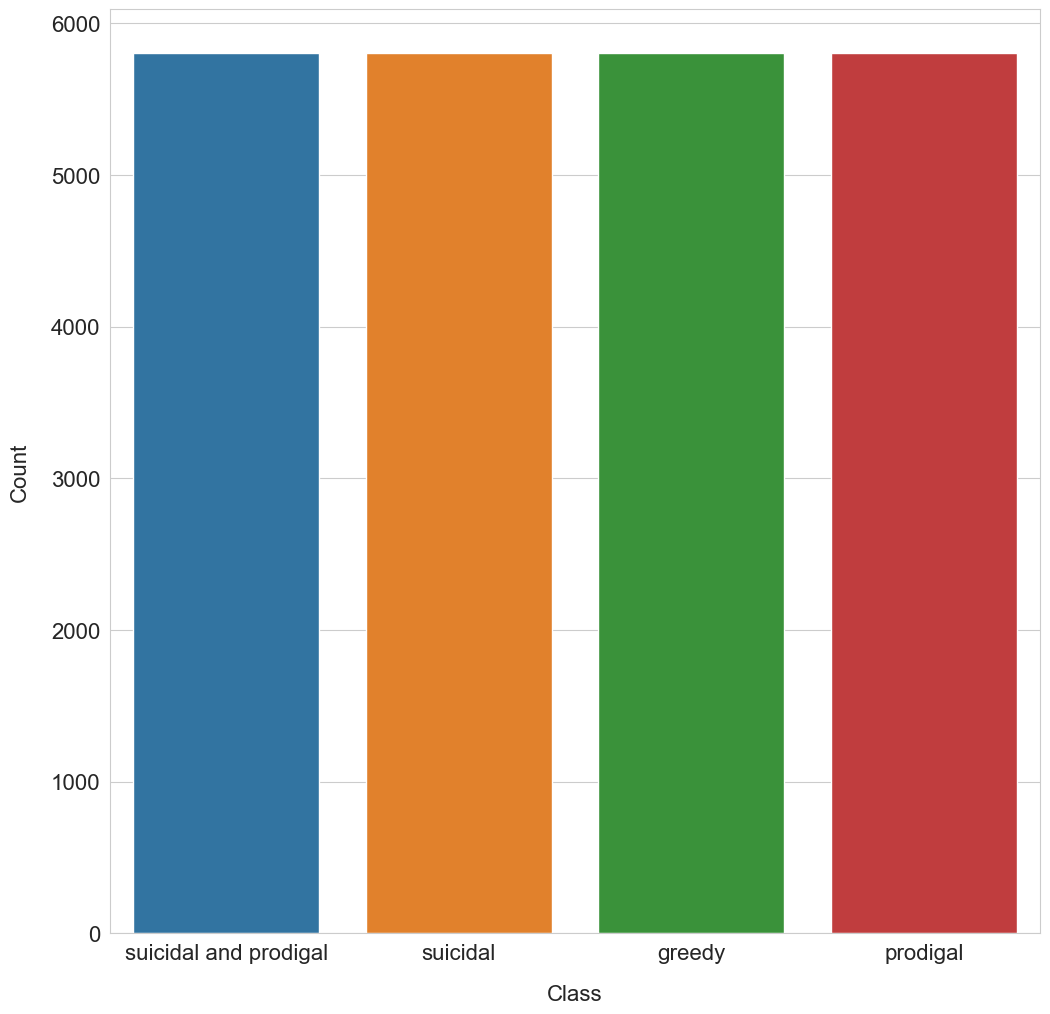

In [14]:
font_size = 20
entire_dataset = np.concatenate((y_train_res, y_val_res, y_test_res))
entire_dataset = pd.DataFrame(entire_dataset)

entire_dataset = entire_dataset.replace(
    {0: 'normal', 1: 'suicidal', 2: 'prodigal', 3: 'greedy', 4: 'suicidal and prodigal'})

fig = plt.figure(figsize=(12, 12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, labelpad=15)
plt.xlabel('Class', fontsize=16, labelpad=15)
ax = sns.countplot(x=0, data=entire_dataset)
ax.set(xlabel="Class", ylabel = "Count")

plt.savefig('outputs_4/class_resample.pdf', bbox_inches='tight')

In [15]:
entire_dataset

,0
0,suicidal and prodigal
1,suicidal
2,greedy
3,greedy
4,prodigal
...,...
23199,suicidal and prodigal
23200,suicidal and prodigal
23201,suicidal and prodigal
23202,suicidal and prodigal


In [16]:
pd.value_counts(entire_dataset[0], sort=True).sort_index()

greedy                   5801
prodigal                 5801
suicidal                 5801
suicidal and prodigal    5801
Name: 0, dtype: int64

#Standart models

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [18]:
df = pd.DataFrame(np.concatenate([X_train_res, X_val_res, X_test_res]))
y = pd.DataFrame(np.concatenate([y_train_res,y_val_res,y_test_res]))
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Model Testing

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

cv_inner = StratifiedKFold(n_splits=5)

reg_RF = RandomForestClassifier(random_state=17)
reg_lin = LogisticRegression()
reg_DT = DecisionTreeClassifier(random_state=17, )
reg_MLP = MLPClassifier(random_state=17)
reg_KN = KNeighborsClassifier()
reg_SVC = SVC(random_state=17, probability=True, )

space_rf = dict()
space_rf['n_estimators'] = [i for i in range(1, 10)]
space_rf['max_features'] = [i for i in range(1, 30)]
space_rf['max_depth'] = [i for i in range(2, 30)]
space_rf['criterion'] = ["gini", "entropy"]
# space_rf['random_state'] = [i for i in range(0, 3000)]

space_lr = dict()
space_lr['C'] = np.linspace(0.0001, 10, 15)
space_lr['max_iter'] = np.linspace(0, 200, 200)
space_lr['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga']

space_dt = dict()
space_dt['max_features'] = ["auto", "sqrt", "log2"]
space_dt['max_depth'] = [i for i in range(10, 30)]
space_dt['criterion'] = ["gini", "entropy"]
# space_dt['random_state'] = [i for i in range(0, 3000)]

space_mlp = dict()
space_mlp['solver'] = ['lbfgs', 'sgd', 'adam']
space_mlp['hidden_layer_sizes'] = [i for i in range(100, 250)]
space_mlp['max_iter'] = [i for i in range(10, 150)]
# space_mlp['random_state'] = [i for i in range(0, 3000)]

space_kn = dict()
space_kn['n_neighbors'] = [i for i in range(1, 10)]
space_kn['weights'] = ['uniform', 'distance']
space_kn['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']

space_svc = dict()
space_svc['C'] = np.linspace(0.001, 10, 200)
space_svc['kernel'] = ['poly', 'rbf']
# space_svc['random_state'] = [i for i in range(0, 3000)]

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score


def addToResults(report_df, test_x, test_y, y_pred_lr, name, model, params_best):
    report = pd.DataFrame(columns=['Accuracy'], data=[0])
    report['F1'] = f1_score(test_y, y_pred_lr, average="weighted")
    report['Precision'] = precision_score(test_y, y_pred_lr, average="weighted")
    report['Recall'] = recall_score(test_y, y_pred_lr, average="weighted")
    report['Accuracy'] = model.score(test_x, test_y)
    report['Balanced Acc'] = balanced_accuracy_score(test_y, y_pred_lr)
    # report['ROC-AUC'] = roc_auc_score(test_y, model.predict_proba(test_x)[:, 1], average="weighted")
    report['params'] = params_best

    report.index = [name]
    report_df = report_df.append(report)

    return report_df

In [21]:
def accuracies(y_pred, y_test):
    # y_test = y_test.reset_index(drop = True)
    y_pred = y_pred.to_numpy()
    normal_correct = 0
    suicidal_correct = 0
    prodigal_correct = 0
    greedy_correct = 0
    suicidal_prodigal_correct = 0

    normal_quantity = 0
    suicidal_quantity = 0
    prodigal_quantity = 0
    greedy_quantity = 0
    suicidal_prodigal_quantity = 0
    false_negative = 0

    for i in range(0, len(y_test)):
        if y_pred[i][0] == y_test[i] and y_test[i] == 0:
            normal_correct = normal_correct + 1
        if y_pred[i][0] == y_test[i] and y_test[i] == 1:
            suicidal_correct = suicidal_correct + 1
        if y_pred[i][0] == y_test[i] and y_test[i] == 2:
            prodigal_correct = prodigal_correct + 1
        if y_pred[i][0] == y_test[i] and y_test[i] == 3:
            greedy_correct = greedy_correct + 1
        if y_pred[i][0] == y_test[i] and y_test[i] == 4:
            suicidal_prodigal_correct = suicidal_prodigal_correct + 1

        if y_test[i] == 0:
            normal_quantity = normal_quantity + 1
        if y_test[i] == 1:
            suicidal_quantity = suicidal_quantity + 1
        if y_test[i] == 2:
            prodigal_quantity = prodigal_quantity + 1
        if y_test[i] == 3:
            greedy_quantity = greedy_quantity + 1
        if y_test[i] == 4:
            suicidal_prodigal_quantity = suicidal_prodigal_quantity + 1

        if y_test[i] != 0 and y_pred[i][0] == 0:
            false_negative = false_negative + 1

    # print('normal accuracy:', normal_correct / normal_quantity)
    print('suicidal accuracy:', suicidal_correct / suicidal_quantity)
    print('prodigal accuracy:', prodigal_correct / prodigal_quantity)
    print('greedy accuracy:', greedy_correct / greedy_quantity)
    print('suicidal and prodigal accuracy', suicidal_prodigal_correct / suicidal_prodigal_quantity)
    print(normal_quantity, suicidal_quantity, prodigal_quantity, greedy_quantity, suicidal_prodigal_quantity)

    print('false negative:', false_negative / (
                suicidal_quantity + prodigal_quantity + greedy_quantity + suicidal_prodigal_quantity))

In [22]:
from joblib import dump
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


def xval_test(model, space, df_report, train_x, train_y, test_x, test_y):
    acc_best = 0
    params_best = dict()
    num_iteration = 5
    cv_inner = StratifiedKFold(n_splits=5)

    for i in range(0, num_iteration):
        search = RandomizedSearchCV(model, space, scoring='accuracy', cv=cv_inner, n_jobs=3)
        result = search.fit(train_x, train_y)
        best_model = result.best_estimator_
        yhat_temp = best_model.predict(test_x)
        acc = accuracy_score(test_y, yhat_temp)
        if (acc_best < acc):
            best_model_save = best_model
            params_best = result.best_params_
            acc_best = acc
            yhat = yhat_temp
            dump(result, f'outputs_4/{type(best_model_save).__name__}.joblib')

    print(type(best_model_save).__name__)
    print('>acc=%.3f, cfg=%s' % (acc_best, params_best))
    print('Accuracy: %.3f ' % (acc_best))

    accuracies(test_y, yhat)

    cm = confusion_matrix(test_y, yhat)

    # Plot confusion matrix
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = '{0}. Accuracy Score: {1}'.format(type(best_model_save).__name__, acc_best)
    plt.title(all_sample_title, size=15)
    plt.show()
    df_report = addToResults(df_report, test_x,
                             test_y, yhat, type(best_model_save).__name__, best_model_save, str(params_best))

    return df_report

RandomForestClassifier
>acc=0.970, cfg={'n_estimators': 9, 'max_features': 26, 'max_depth': 21, 'criterion': 'gini'}
Accuracy: 0.970 
suicidal accuracy: 0.9805380652547224
prodigal accuracy: 0.9581181870338497
greedy accuracy: 0.9691027926322044
suicidal and prodigal accuracy 0.9714924538848518
0 1747 1743 1683 1789
false negative: 0.0


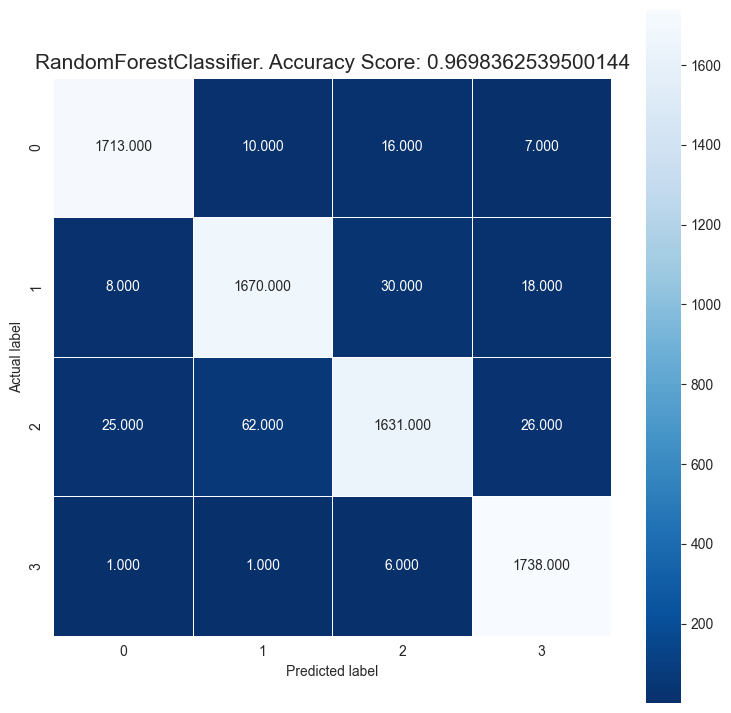

LogisticRegression
>acc=0.837, cfg={'solver': 'newton-cg', 'max_iter': 177.8894472361809, 'C': 5.714328571428571}
Accuracy: 0.837 
suicidal accuracy: 0.8961257720381808
prodigal accuracy: 0.8771411695215594
greedy accuracy: 0.7612826603325415
suicidal and prodigal accuracy 0.8131929046563193
0 1781 1693 1684 1804
false negative: 0.0


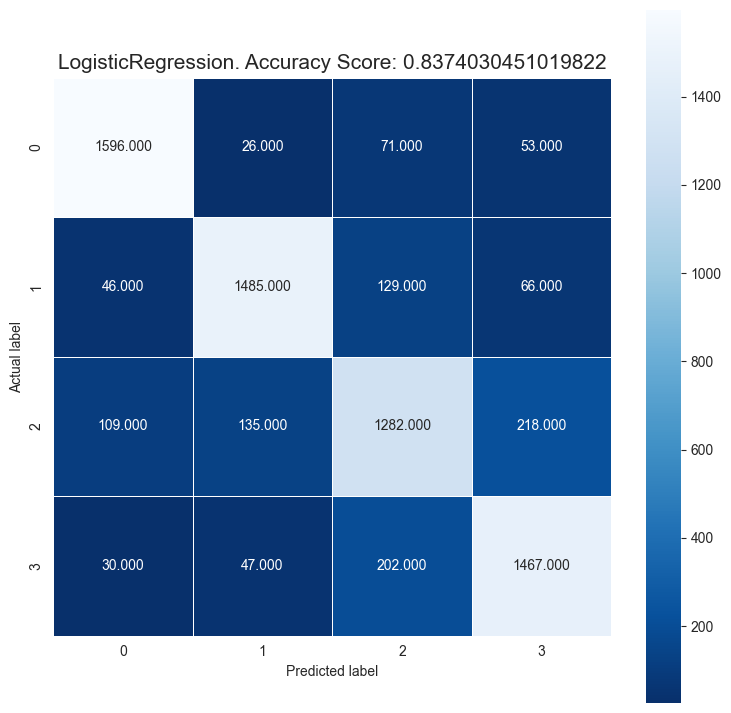

DecisionTreeClassifier
>acc=0.950, cfg={'max_features': 'sqrt', 'max_depth': 22, 'criterion': 'gini'}
Accuracy: 0.950 
suicidal accuracy: 0.9674843126069596
prodigal accuracy: 0.9435718440954043
greedy accuracy: 0.9358226371061844
suicidal and prodigal accuracy 0.9527027027027027
0 1753 1719 1714 1776
false negative: 0.0


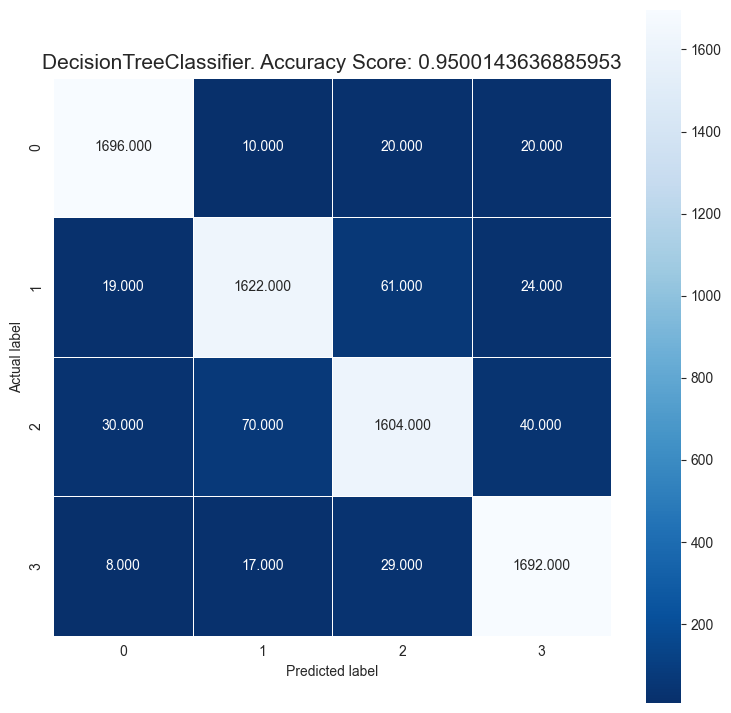

MLPClassifier
>acc=0.984, cfg={'solver': 'lbfgs', 'max_iter': 134, 'hidden_layer_sizes': 222}
Accuracy: 0.984 
suicidal accuracy: 0.9931389365351629
prodigal accuracy: 0.968803176403857
greedy accuracy: 0.9898749255509232
suicidal and prodigal accuracy 0.9836250705815923
0 1749 1763 1679 1771
false negative: 0.0


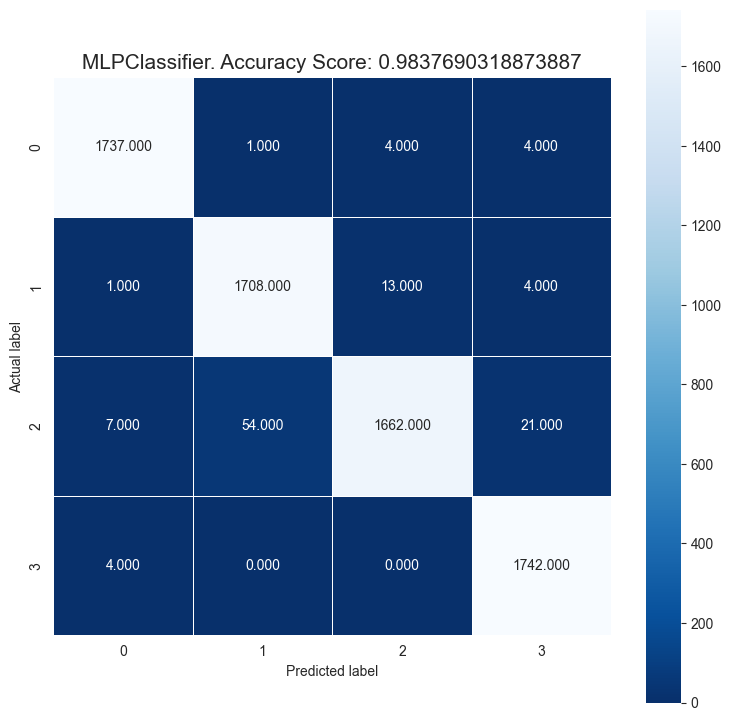

KNeighborsClassifier
>acc=0.977, cfg={'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'brute'}
Accuracy: 0.977 
suicidal accuracy: 0.9803370786516854
prodigal accuracy: 0.958728388176241
greedy accuracy: 0.9981203007518797
suicidal and prodigal accuracy 0.9721137757947574
0 1780 1793 1596 1793
false negative: 0.0


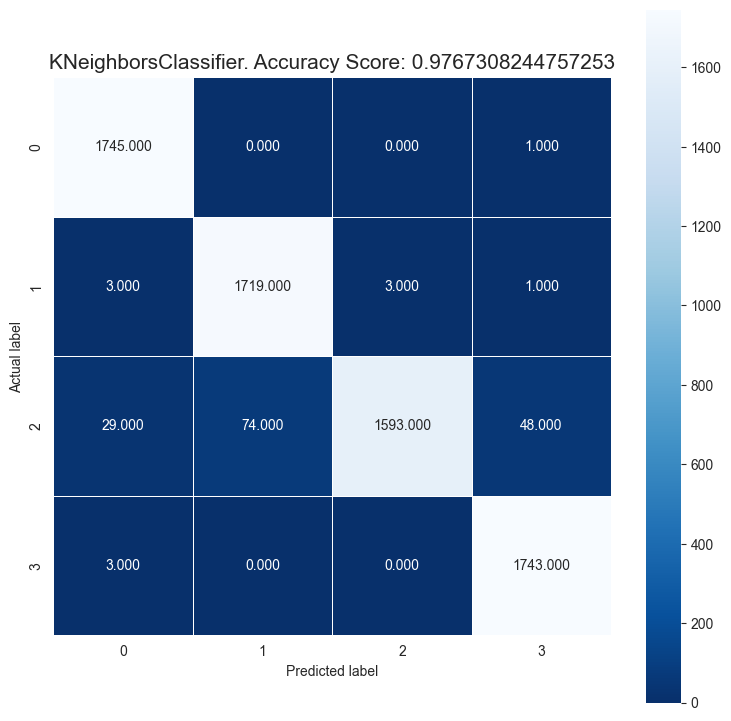

KeyboardInterrupt: 

In [57]:
df_report_2 = pd.DataFrame()

df_report_2 = xval_test(reg_RF, space_rf, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_lin, space_lr, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_DT, space_dt, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_MLP, space_mlp, df_report_2, df_train, y_train, df_test, y_test)
df_report_2 = xval_test(reg_KN, space_kn, df_report_2, df_train, y_train, df_test, y_test)


In [58]:
df_report_2

,Accuracy,F1,Precision,Recall,Balanced Acc,params
RandomForestClassifier,0.969836,0.969724,0.969847,0.969836,0.969820,"{'n_estimators': 9, 'max_features': 26, 'max_d..."
LogisticRegression,0.837403,0.836967,0.836842,0.837403,0.837440,"{'solver': 'newton-cg', 'max_iter': 177.889447..."
DecisionTreeClassifier,0.950014,0.949929,0.949918,0.950014,0.949976,"{'max_features': 'sqrt', 'max_depth': 22, 'cri..."
MLPClassifier,0.983769,0.983708,0.983902,0.983769,0.983777,"{'solver': 'lbfgs', 'max_iter': 134, 'hidden_l..."
KNeighborsClassifier,0.976731,0.976427,0.977372,0.976731,0.976768,"{'weights': 'uniform', 'n_neighbors': 1, 'algo..."


SVC
>acc=0.990, cfg={'kernel': 'rbf', 'C': 9.648276381909549}
Accuracy: 0.990 
suicidal accuracy: 0.9937286202964652
prodigal accuracy: 0.9777397260273972
greedy accuracy: 0.9929783499122293
suicidal and prodigal accuracy 0.9954207212364052
0 1754 1752 1709 1747
false negative: 0.0


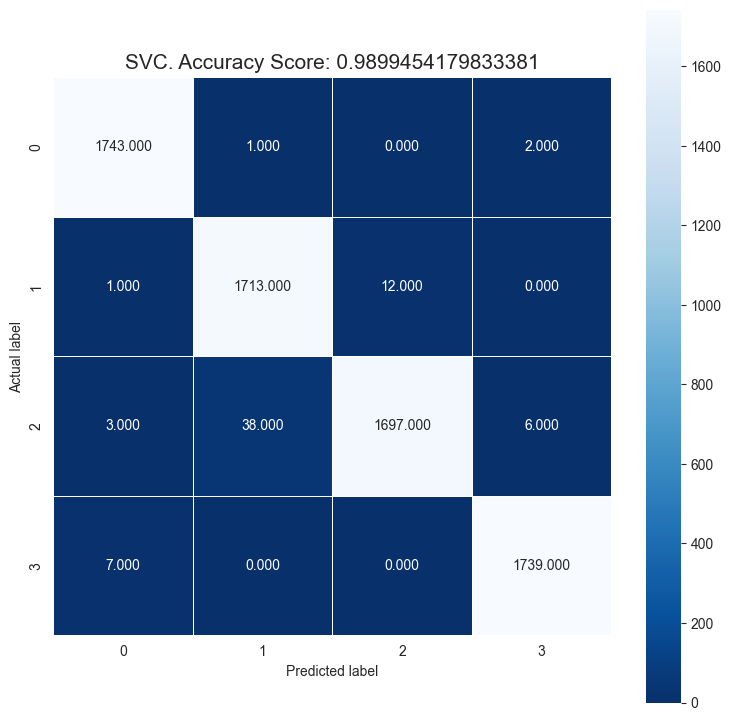

In [59]:
df_report_2 = xval_test(reg_SVC, space_svc, df_report_2, df_train, y_train, df_test, y_test)

In [60]:
df_report_2

,Accuracy,F1,Precision,Recall,Balanced Acc,params
RandomForestClassifier,0.969836,0.969724,0.969847,0.969836,0.969820,"{'n_estimators': 9, 'max_features': 26, 'max_d..."
LogisticRegression,0.837403,0.836967,0.836842,0.837403,0.837440,"{'solver': 'newton-cg', 'max_iter': 177.889447..."
DecisionTreeClassifier,0.950014,0.949929,0.949918,0.950014,0.949976,"{'max_features': 'sqrt', 'max_depth': 22, 'cri..."
MLPClassifier,0.983769,0.983708,0.983902,0.983769,0.983777,"{'solver': 'lbfgs', 'max_iter': 134, 'hidden_l..."
KNeighborsClassifier,0.976731,0.976427,0.977372,0.976731,0.976768,"{'weights': 'uniform', 'n_neighbors': 1, 'algo..."
SVC,0.989945,0.989933,0.990001,0.989945,0.989948,"{'kernel': 'rbf', 'C': 9.648276381909549}"
